# BSUD Project 2

# Import Labraries: 

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from textblob import TextBlob
import os
import nltk




showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# Set Up Paths

In [52]:
# Set up paths
data_folder = "../data"
reviews_path = os.path.join(data_folder, "tripadvisor_hotel_reviews.csv")
sentiment_path = os.path.join(data_folder, "tripadvisor_hotel_reviews_sentiment.csv")
target_sentiment_path = os.path.join(data_folder, "tripadvisor_hotel_reviews_target_sentiment.csv")
stopwords_path = os.path.join(data_folder, "Additional_Stopwords.txt")

import os

# Print each file path and check existence
print("Reviews path exists:", os.path.exists(reviews_path))
print("Sentiment path exists:", os.path.exists(sentiment_path))
print("Target sentiment path exists:", os.path.exists(target_sentiment_path))
print("Stopwords path exists:", os.path.exists(stopwords_path))



Reviews path exists: True
Sentiment path exists: True
Target sentiment path exists: True
Stopwords path exists: True


# Load Data

In [44]:
# Load datasets
print(os.path.exists(stopwords_path))  # Should return True if the file exists

import os

# Check current working directory
print(os.getcwd())

# Replace 'absolute_path_to_data_folder' with the full path to your data folder
stopwords_path =os.path.join(data_folder, "Additional_Stopwords.txt")

# Load stopwords
try:
    with open(stopwords_path, "r") as file:
        additional_stopwords = file.read().splitlines()
    print("Stopwords loaded successfully!")
except Exception as e:
    print(f"Error loading stopwords: {e}")



True
/Users/muhi/PycharmProjects/scientificProject/models
Stopwords loaded successfully!


# Preprocessing

In [45]:
# Combine NLTK stopwords with additional stopwords
nltk_stopwords = set(stopwords.words("english"))
combined_stopwords = nltk_stopwords.union(set(additional_stopwords))

lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in combined_stopwords]
    return " ".join(tokens)

# Apply preprocessing
reviews["processed_text"] = reviews["Review"].apply(preprocess)
reviews.head()



,Review,Rating,processed_text
0,nice hotel expensive parking got good deal sta...,4,expensive parking deal anniversary arrived lat...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,room 4 4 large mediterranean suite comfortable...
3,"unique, great stay, wonderful time hotel monac...",5,unique wonderful excellent short stroll main d...
4,"great stay great stay, went seahawk game aweso...",5,seahawk game awesome downfall view building co...


# Sentiment Analysis

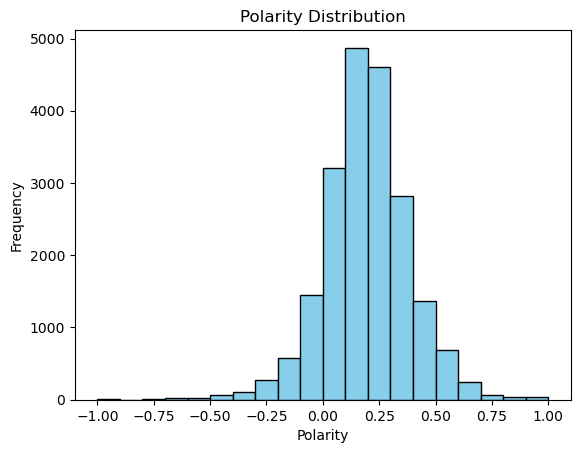

In [46]:
# Sentiment analysis with TextBlob
reviews["polarity"] = reviews["processed_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
reviews["subjectivity"] = reviews["processed_text"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Visualize sentiment polarity distribution
plt.hist(reviews["polarity"], bins=20, color="skyblue", edgecolor="black")
plt.title("Polarity Distribution")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()


# Topic Modelling

Loaded 20491 reviews.
Text preprocessing complete.
TF-IDF matrix shape: (20491, 1000)
LDA model fitted.
Topic 1:
small, bed, night, good, location, stay, nice, great, hotel, room
Topic 2:
staff, manager, day, night, stay, desk, service, told, room, hotel
Topic 3:
room, people, good, day, great, time, pool, food, beach, resort
Topic 4:
service, good, excellent, stayed, staff, stay, location, great, room, hotel
Topic 5:
station, staff, clean, walk, breakfast, good, location, great, room, hotel


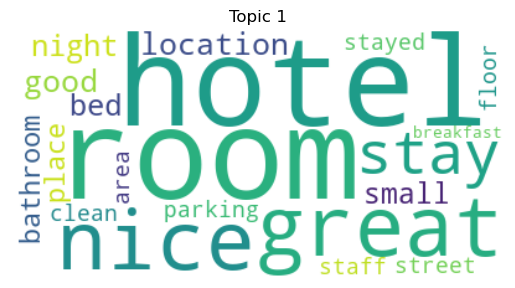

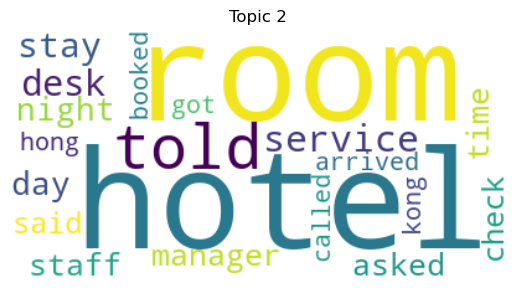

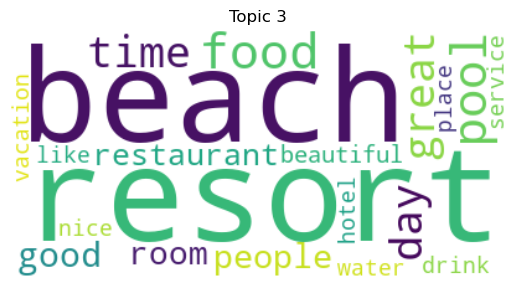

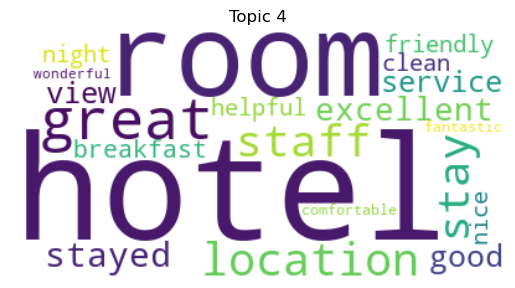

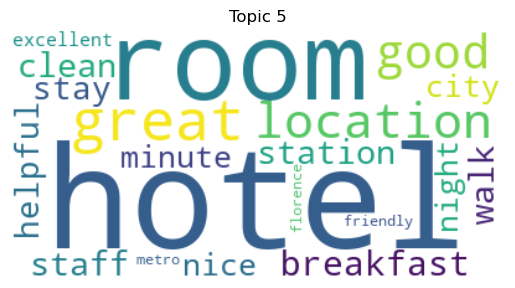

In [58]:
##2nd version of LDA
# Load your dataset (replace with your actual file path)
data_folder = "../data"
reviews_path = f"{data_folder}/tripadvisor_hotel_reviews.csv"

reviews = pd.read_csv(reviews_path)

# Ensure there is a 'Review' column in your dataset
if 'Review' not in reviews.columns:
    raise ValueError("Dataset must contain a 'Review' column.")

print(f"Loaded {len(reviews)} reviews.")
# Define preprocessing function
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    if pd.isnull(text):
        return ""
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return " ".join(tokens)

# Apply preprocessing to reviews
reviews["processed_text"] = reviews["Review"].apply(preprocess)
print("Text preprocessing complete.")
# Create TF-IDF features
vectorizer = TfidfVectorizer(max_features=1000, stop_words="english")
X = vectorizer.fit_transform(reviews["processed_text"])

print(f"TF-IDF matrix shape: {X.shape}")
# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Set 5 topics
lda.fit(X)

print("LDA model fitted.")
# Display topics and their top words
num_words = 10  # Number of words to display per topic

for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print(", ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-num_words:]]))
# Generate and display word clouds for topics
for idx, topic in enumerate(lda.components_):
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(
        {vectorizer.get_feature_names_out()[i]: topic[i] for i in topic.argsort()[-20:]}
    )
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {idx + 1}")
    plt.show()


# Clustering

/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


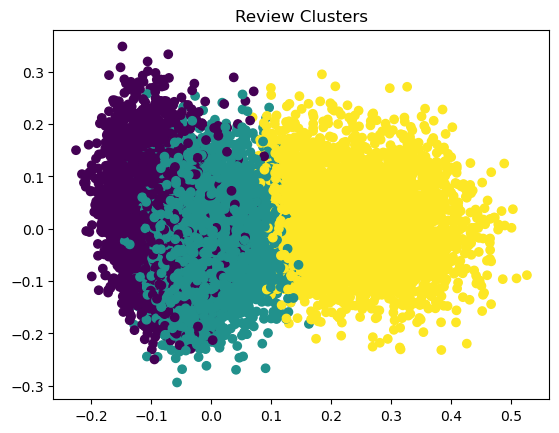

In [48]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
reviews["cluster"] = kmeans.fit_predict(tfidf_matrix)

# Visualize clusters
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=reviews["cluster"], cmap="viridis")
plt.title("Review Clusters")
plt.show()


# Generate Insights

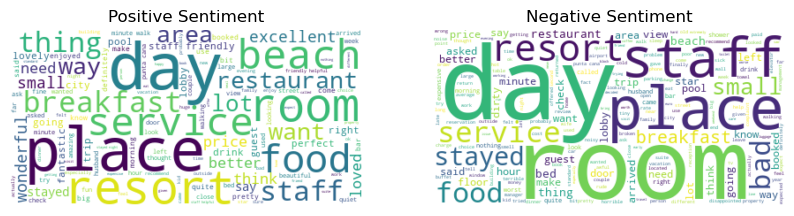

In [49]:
positive_reviews = " ".join(reviews[reviews["polarity"] > 0]["processed_text"])
negative_reviews = " ".join(reviews[reviews["polarity"] < 0]["processed_text"])

# Generate word clouds
positive_wc = WordCloud(background_color="white").generate(positive_reviews)
negative_wc = WordCloud(background_color="white").generate(negative_reviews)

# Display word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Sentiment")

plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Sentiment")

plt.show()


# Save Results

In [50]:
reviews.to_csv(os.path.join(data_folder, "processed_reviews.csv"), index=False)
